In [2]:
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
LABELS_FILENAME = "road/full_CNN_labels.p"
TRAINING_FILENAME = "road/full_CNN_train.p"

# Загрузка данных

In [4]:
def load_file(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

def load_dataset(train_filename, labels_filename):
    images = load_file(train_filename)
    X_train = np.array(images, dtype='float')

    labels = load_file(labels_filename)
    Y_train = np.array(labels, dtype='float')

    return X_train, Y_train

In [5]:
X_train, Y_train = load_dataset(TRAINING_FILENAME, LABELS_FILENAME)

X_train /= 255.

In [6]:
print(X_train.shape)
print(Y_train.shape)

(12764, 80, 160, 3)
(12764, 80, 160, 1)


# Пример из датасета


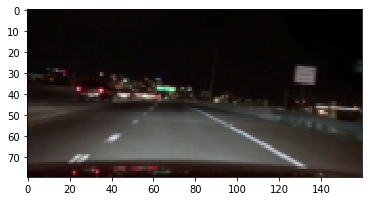

In [7]:
plt.imshow(X_train[0])

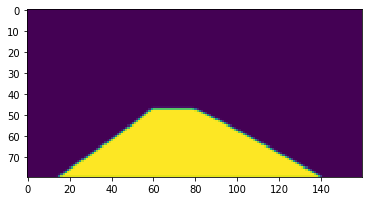

In [8]:
plt.imshow(Y_train[0].reshape(80, 160))

In [9]:
model =  keras.Sequential([
    keras.layers.BatchNormalization(input_shape=(80, 160, 3)),
    keras.layers.Conv2D(8, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.UpSampling2D(),

    keras.layers.Conv2DTranspose(64, (3, 3), activation='relu'),
    keras.layers.Conv2DTranspose(32, (3, 3), activation='relu'),
    keras.layers.Conv2DTranspose(16, (3, 3), activation='relu'),
    keras.layers.UpSampling2D(),
    keras.layers.Conv2DTranspose(8, (3, 3), activation='relu'),
    keras.layers.Conv2DTranspose(1, (3, 3), activation='relu')
])


model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 80, 160, 3)        12        
_________________________________________________________________
conv2d (Conv2D)              (None, 78, 158, 8)        224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 79, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 77, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 75, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 36, 64)        0

In [10]:
epochs_num = 5
history = model.fit(X_train, Y_train, epochs=epochs_num, validation_split=0.2)

Train on 10211 samples, validate on 2553 samples
Epoch 1/5
10211/10211 [==============================] - 366s 36ms/sample - loss: 4330.7328 - accuracy: 0.6016 - val_loss: 2599.7181 - val_accuracy: 0.7530
Epoch 2/5
10211/10211 [==============================] - 354s 35ms/sample - loss: 2012.5815 - accuracy: 0.7537 - val_loss: 1885.4249 - val_accuracy: 0.7736
Epoch 3/5
10211/10211 [==============================] - 350s 34ms/sample - loss: 1609.0039 - accuracy: 0.7689 - val_loss: 1635.4981 - val_accuracy: 0.7849
Epoch 4/5
10211/10211 [==============================] - 348s 34ms/sample - loss: 1321.0432 - accuracy: 0.7793 - val_loss: 2842.3761 - val_accuracy: 0.7147
Epoch 5/5
10211/10211 [==============================] - 348s 34ms/sample - loss: 1197.5906 - accuracy: 0.7852 - val_loss: 1271.2367 - val_accuracy: 0.7899


In [12]:
model.save('road/model.h5')

# Генерация разметки на случайном изображении

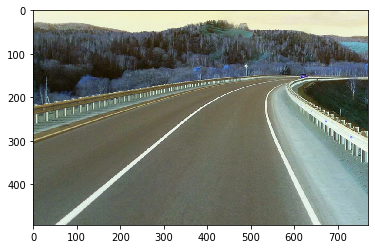

In [8]:
import cv2
img = cv2.imread("road/road.jpg")
plt.imshow(img)

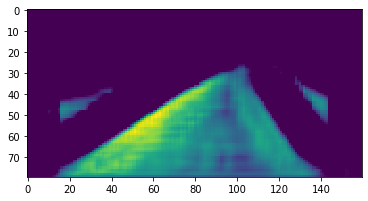

In [9]:
model = keras.models.load_model('road/model.h5')

res = cv2.resize(img, dsize=(160, 80))
predicted_img = model.predict(res[None, :,:,:]/255.)[0]
plt.imshow(predicted_img.reshape(80, 160))